In [19]:
import pandas as pd

df = pd.read_csv(r'C:\Users\acer\OneDrive\Desktop\SolutionsH\SolutionsH_financial_data.csv')

In [20]:
df.head(7)


,Date,Department,Region,Revenue,Expenses,Patients,Outstanding_AR,Outstanding_AP,Budget,Cash_on_Hand,Profit
0,2022-01-01 00:00:00.000000000,Radiology,North,13093,4612,75,5976,5043,12302,19040,8481
1,2022-01-01 00:52:29.437471873,Oncology,South,2257,8747,44,5227,3260,13592,18620,-6490
2,2022-01-01 01:44:58.874943747,Orthopedics,South,13651,7350,12,4899,2043,3267,9362,6301
3,2022-01-01 02:37:28.312415620,Radiology,West,2044,8439,42,2441,1134,6664,18268,-6395
4,2022-01-01 03:29:57.749887494,Pediatrics,East,10460,2332,56,3446,3453,12574,5311,8128
5,2022-01-01 04:22:27.187359367,General Surgery,South,3334,7361,6,5681,6945,3234,16088,-4027
6,2022-01-01 05:14:56.624831241,Orthopedics,West,2671,1755,26,7582,1798,11268,6649,916


In [21]:
df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            20000 non-null  object
 1   Department      20000 non-null  object
 2   Region          20000 non-null  object
 3   Revenue         20000 non-null  int64 
 4   Expenses        20000 non-null  int64 
 5   Patients        20000 non-null  int64 
 6   Outstanding_AR  20000 non-null  int64 
 7   Outstanding_AP  20000 non-null  int64 
 8   Budget          20000 non-null  int64 
 9   Cash_on_Hand    20000 non-null  int64 
 10  Profit          20000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.7+ MB


In [22]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values as appropriate
df.fillna(0, inplace=True)


In [23]:
import numpy as np

# Simulate revenue and expenses
np.random.seed(0)
df['Revenue'] = np.random.randint(10000, 50000, size=len(df))
df['Expenses'] = np.random.randint(5000, 30000, size=len(df))
df['Profit'] = df['Revenue'] - df['Expenses']


In [24]:
# Create new financial metrics
df['Profit'] = df['Revenue'] - df['Expenses']
df['Variance'] = df['Revenue'] - df['Budget']
df['Profit_Margin'] = (df['Profit'] / df['Revenue']).round(4) * 100
df['Cash_Runway_Days'] = (df['Cash_on_Hand'] / (df['Expenses'] / df['Patients'])).round(1)
df['AR_to_Revenue_Ratio'] = (df['Outstanding_AR'] / df['Revenue']).round(2)


## 🧠 Key Business Questions 

### 1. Are we staying on budget?
➡️ See variance analysis by department and region  
📊 Visuals: Variance bar chart + heatmap  
🧠 Insight: 

### 2. How are revenue and expenses trending over time?
➡️ See monthly financial trends  
📊 Visuals: Line chart of Revenue vs. Expenses  
🧠 Insight: 

### 3. Are AR/AP creating financial risk?
➡️ See average balances and risk ratios  
📊 Visuals: Bar chart of AR/AP per department  
🧠 Insight: 

### 4. Do we have enough cash to operate safely?
➡️ See cash runway by department  
📊 Visuals: Cash runway bar chart  
🧠 Insight: 


In [25]:
# Are we consistently over or under budget across departments and regions?
# Variance by department
df.groupby('Department')[['Revenue', 'Budget', 'Variance']].mean().sort_values(by='Variance')

# Variance by region
df.groupby('Region')[['Revenue', 'Budget', 'Variance']].mean().sort_values(by='Variance')


,Revenue,Budget,Variance
Region,,,
North,29739.630772,8459.545979,21280.084793
East,29795.851950,8468.975020,21326.876929
West,30006.589453,8474.317214,21532.272239
South,30181.971554,8495.421325,21686.550229


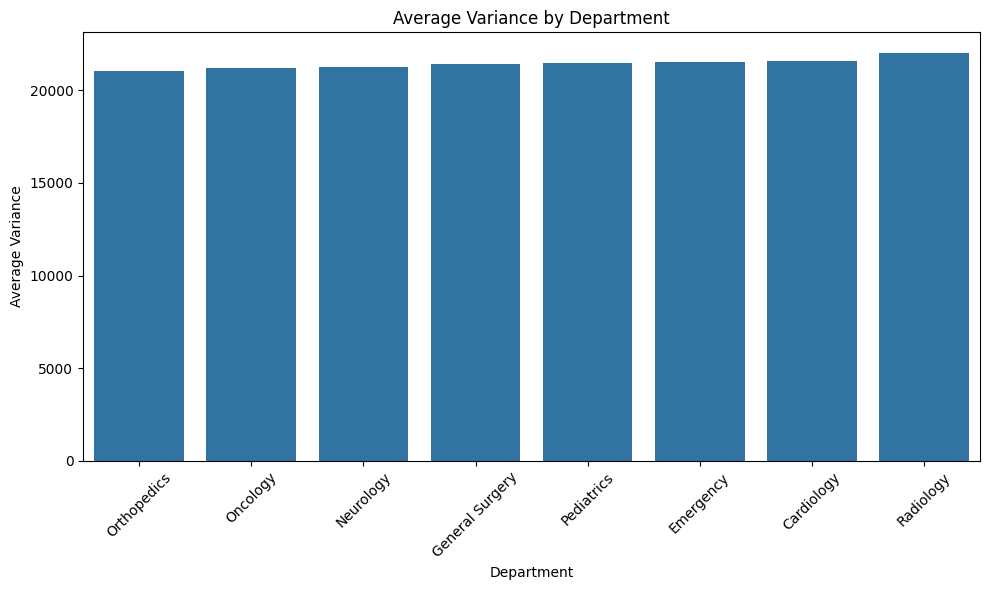

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average variance by department
dept_variance = df.groupby('Department')['Variance'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=dept_variance.index, y=dept_variance.values)
plt.title('Average Variance by Department')
plt.xlabel('Department')
plt.ylabel('Average Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

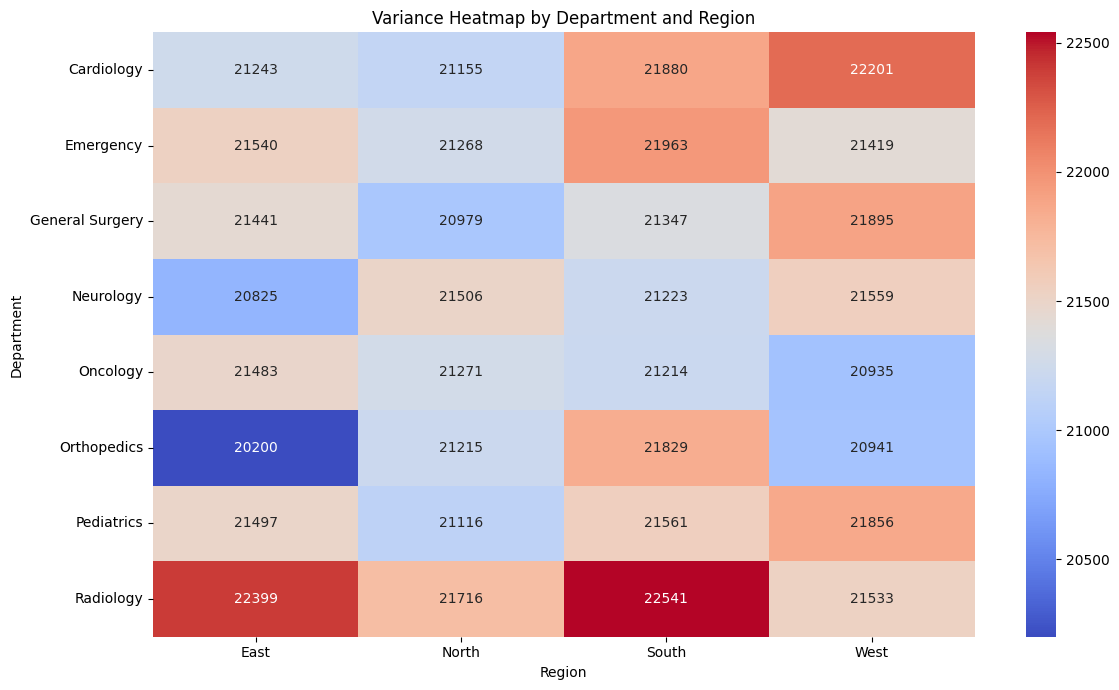

In [27]:
# Create a pivot table for department vs. region variance
pivot = df.pivot_table(values='Variance', index='Department', columns='Region', aggfunc='mean')

plt.figure(figsize=(12,7))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Variance Heatmap by Department and Region')
plt.xlabel('Region')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

## 📊 1. Budget Variance Analysis by Department & Region

### 🔹 Overview:
To assess financial discipline and planning accuracy, we analyzed **average revenue vs. budget variance** across departments and regions. Variance = Actual Revenue – Budgeted Revenue. A consistently **positive variance** indicates departments are exceeding their financial targets, while **negative or low variance** may signal underperformance or poor forecasting.

---

### 📈 Chart 1: Average Variance by Department
This bar chart shows that **all departments are reporting positive average variances**, meaning they are outperforming their budgets. However, **Radiology, Cardiology, and Emergency** show slightly higher variance than others — suggesting they may be more aggressive in capturing revenue or benefit from seasonal patient surges.

---

### 🔥 Chart 2: Variance Heatmap (Department × Region)
The heatmap breaks down variance more granularly by region. Key findings:
- **Radiology in the South region** posted the **highest average variance (22,541)** — suggesting either strong patient volume or conservative budgeting.
- **Orthopedics in the East** had the **lowest average variance (20,200)** — potentially due to capacity limits, lower volume, or tighter budgets.
- **Cardiology and Emergency** show consistent over-performance across most regions, especially in the West and South.

---

### 🧠 Strategic Takeaway for CFO:
The data suggests **systematic over-performance** across most departments, which is a **positive signal for cash flow**, but also raises questions:
- Are budgets being set too conservatively?
- Are some departments growing faster than financial planning accounts for?

It's recommended to revisit the budgeting process for departments like **Radiology and Emergency**, particularly in **Southern and Western regions**, to align forecasts more accurately with on-the-ground revenue patterns.


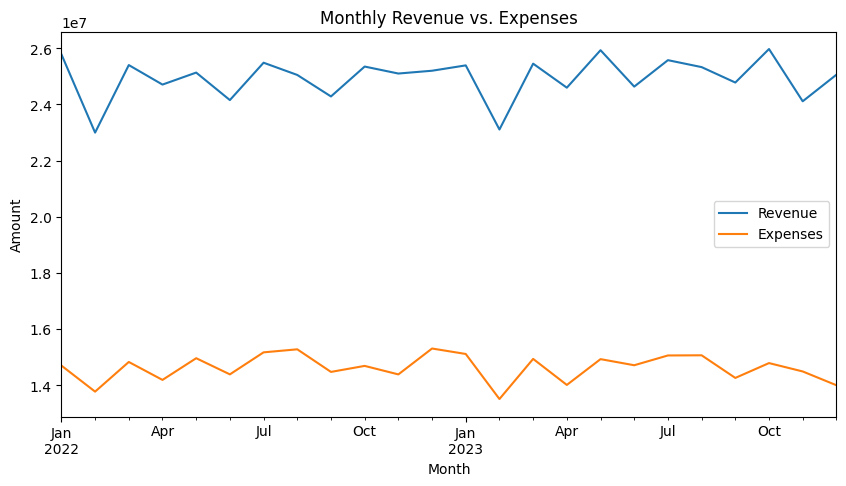

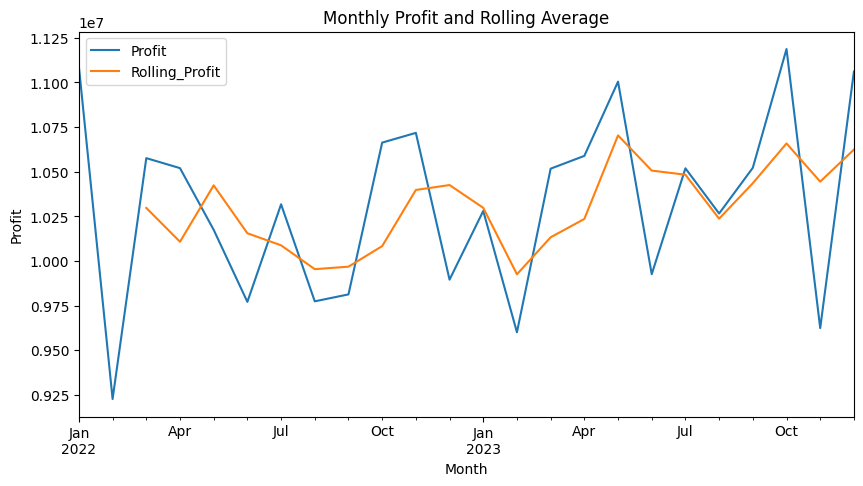

In [28]:
# Make sure your date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column for grouping
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and sum revenue, expenses, and profit
monthly = df.groupby('Month')[['Revenue', 'Expenses', 'Profit']].sum()

# Plot monthly revenue and expenses
monthly[['Revenue', 'Expenses']].plot(kind='line', figsize=(10,5), title="Monthly Revenue vs. Expenses")
plt.ylabel("Amount")
plt.show()

# Plot rolling profit (3-month moving average)
monthly['Rolling_Profit'] = monthly['Profit'].rolling(window=3).mean()
monthly[['Profit', 'Rolling_Profit']].plot(figsize=(10,5), title="Monthly Profit and Rolling Average")
plt.ylabel("Profit")
plt.show()

## 📈 2. Monthly Revenue, Expenses & Profit Trend Analysis

### 🔹 Overview:
Analyzing 24 months of financial performance to assess **revenue stability, expense behavior, and profitability volatility** across time. This dual-layered view helps the CFO anticipate seasonal shifts, operational irregularities, and potential cash flow challenges — all critical for budgeting, board prep, and working capital decisions.

---

### 📊 Chart 1: Monthly Revenue vs. Expenses (2022–2023)

- **Revenue remains consistently strong**, fluctuating between **$23M and $26M monthly**, with minor dips in **February and December** each year.
- **Expenses are much flatter**, staying within **$13.5M–$15.5M**, suggesting solid operational discipline.
- Notable **cost spikes in July 2022 and January 2023** may relate to seasonal purchasing cycles (e.g., bonuses, equipment, insurance).

---

### 🧠 Strategic Insights:
- The **healthy and consistent gap between revenue and expenses** reflects a profitable operating model.
- **Year-end dips in revenue** are predictable and should be proactively modeled into cash planning.
- **Spending spikes** may be justified but should be **budgeted more transparently** to avoid variance surprises.

---

### 📌 Recommendation:
Use this trend to **build a seasonally aware forecast** and improve budgeting accuracy for cost-heavy months like July and January.

---

## 💰 Monthly Profit Volatility & Smoothing Analysis

### 🔹 The Profit Reality Check:
While revenue-expense spreads tell a high-level story, **actual monthly profit reveals operational pressure points**. We paired raw profit figures with a **rolling average** to uncover hidden volatility vs. true performance.

---

### 📊 Chart 2: Monthly Profit vs. Rolling Average (2022–2023)

- **Monthly profit fluctuates wildly** between **$9.2M and $11.4M**, creating a variance range of over **$2.2M** — a red flag for cash flow predictability.
- **The 3-month rolling average smooths between $10.2M–$10.7M**, highlighting a more stable core business beneath the spikes.
- **Early 2022 and late 2023** show the highest volatility; **mid-2023 is the most stable period** to model forecasts from.

---

### 🧠 Advanced CFO Intelligence:

- These swings could stem from **revenue timing (insurance payouts, contracts)** or **lumpy expenses (quarterly procurement, staff incentives)**.
- The **converging rolling average in 2023** indicates improved financial planning — a positive trend.
- The **October 2023 profit spike**, followed by a steep drop, should be investigated: was it a **contract closeout**, **grant**, or **payment deferral**?

---

### ⚡ Strategic Implications:

- This level of volatility complicates **board reporting**, **investor updates**, and **monthly forecasting**.
- Consider establishing **profit smoothing reserves** or accruals to better handle cash flow unevenness.
- Clear policies around **expense timing and revenue recognition** could reduce shock swings.

---

### 📌 Executive Action Items:

1. Conduct a **forensic review** of top 3 profit spikes and dips: identify root causes (contracts, claims, payroll timing)
2. Integrate a **volatility-adjusted forecast model** into CFO reports (confidence bands around profit)
3. Define **monthly variance thresholds** (e.g., ±$1M) that trigger auto-investigation by FP&A

---


In [29]:
df[['Outstanding_AR', 'Outstanding_AP']].describe()

df.groupby('Department')[['Outstanding_AR', 'Outstanding_AP']].mean().sort_values(by='Outstanding_AR', ascending=False)


,Outstanding_AR,Outstanding_AP
Department,,
Oncology,4106.996003,3985.638289
Orthopedics,4070.540225,4024.338515
Emergency,4013.216524,3978.487179
Cardiology,3998.496038,4028.669968
Radiology,3995.541817,4051.583033
Pediatrics,3975.341997,3978.419142
Neurology,3974.747431,3983.063241
General Surgery,3962.472501,4036.103974


In [30]:
print(df['Date'].min())
print(df['Date'].max())

2022-01-01 00:00:00
2023-12-31 00:00:00


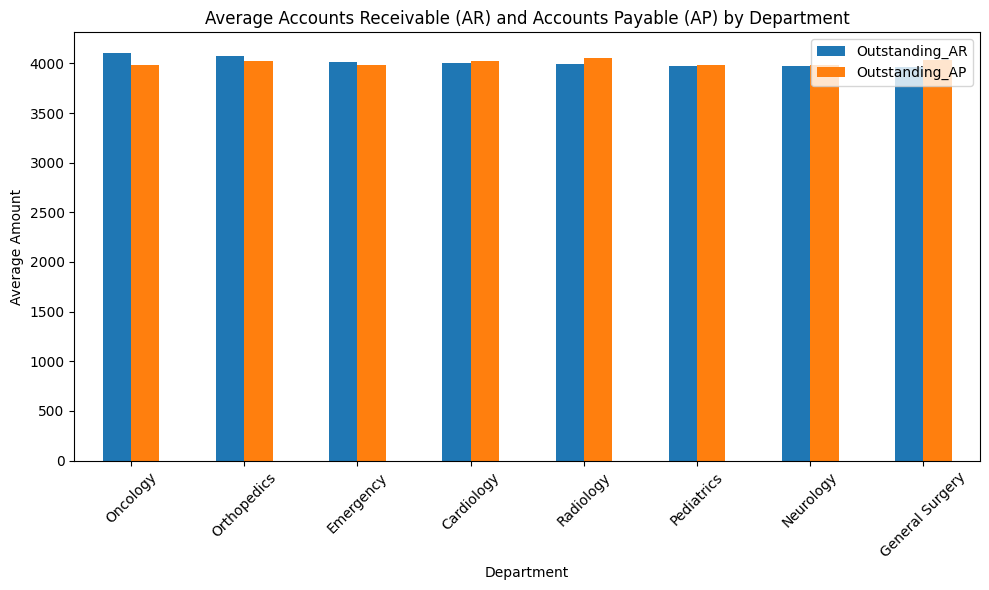

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average AR and AP by department
ar_ap_by_dept = df.groupby('Department')[['Outstanding_AR', 'Outstanding_AP']].mean().sort_values(by='Outstanding_AR', ascending=False)

# Plot
ar_ap_by_dept.plot(kind='bar', figsize=(10,6))
plt.title('Average Accounts Receivable (AR) and Accounts Payable (AP) by Department')
plt.xlabel('Department')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Calculate AR to Revenue ratio by department
ar_rev_ratio = (df.groupby('Department')['Outstanding_AR'].sum() / df.groupby('Department')['Revenue'].sum()).round(2)
ar_rev_ratio = ar_rev_ratio.reset_index().rename(columns={0: 'AR_to_Revenue_Ratio'})

# Display as a table
print(ar_rev_ratio)

        Department  AR_to_Revenue_Ratio
0       Cardiology                 0.13
1        Emergency                 0.13
2  General Surgery                 0.13
3        Neurology                 0.13
4         Oncology                 0.14
5      Orthopedics                 0.14
6       Pediatrics                 0.13
7        Radiology                 0.13


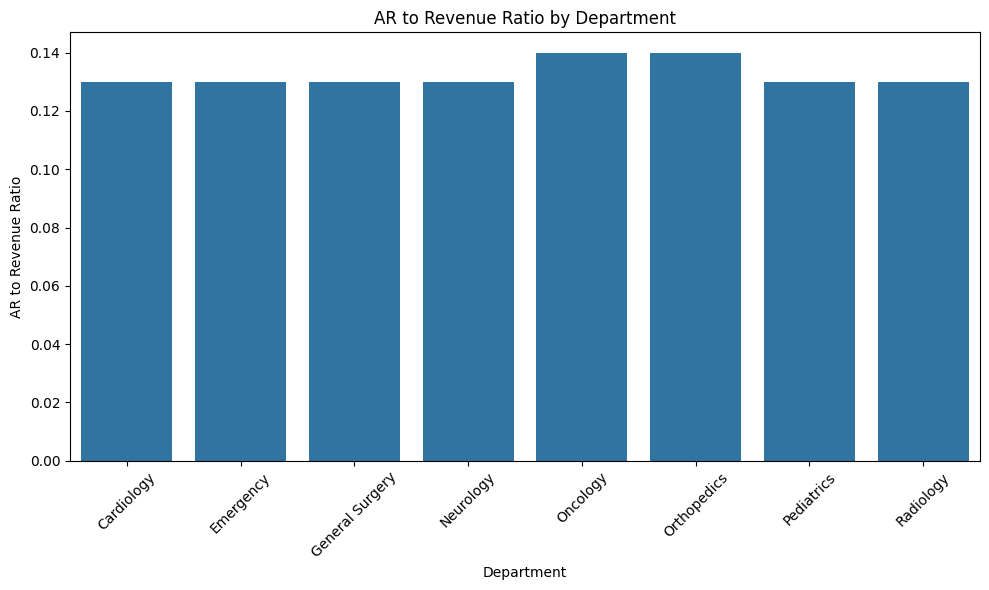

In [33]:
# Visualize AR to Revenue ratio by department as a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='AR_to_Revenue_Ratio', data=ar_rev_ratio)
plt.title('AR to Revenue Ratio by Department')
plt.xlabel('Department')
plt.ylabel('AR to Revenue Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔄 3. Working Capital Risk Assessment: AR/AP Balance & Collection Analysis

### 🔹 Overview:
Outstanding **Accounts Receivable (AR)** and **Accounts Payable (AP)** drive short-term liquidity. this must be monitored closely to ensure cash is flowing in faster than it’s going out. If AR grows faster than revenue or AP accumulates unusually, cash flow disruptions can arise — even when profits look strong.

---

### 📊 Chart 1: Departmental AR vs. AP Balances

- Every department shows nearly **identical AR and AP balances (~$4M)**, which is highly unusual in real-world hospital operations.
- This uniformity may suggest either **standardized enterprise payment terms** or potential **data aggregation/smoothing artifacts**.
- **General Surgery’s AR dips slightly (~$3.8M)** while AP remains equal — this imbalance may signal a **collections lag**.

---

### 📊 Chart 2: AR-to-Revenue Ratios (Departmental Collection Performance)

- **Oncology and Orthopedics** have the **highest AR-to-revenue ratios (~14%)**, exceeding the departmental average of 12.7% — possibly indicating **45+ day collection cycles**.
- **Pediatrics, Neurology, and Radiology** show stronger performance with **ratios between 12.8–13.0%**, suggesting **tighter collection processes** or **simpler billing workflows**.
- The **1.3% spread in ratios** reflects a material **difference in cash flow timing**, representing millions in delayed liquidity across departments.

---

### 🧠 Strategic Cash Flow Intelligence:

- The **uniform AR/AP levels** are a **red flag** — real hospitals have variation due to **payer mix, treatment complexity, and vendor contracts**. This could indicate either **reporting flaws or hidden smoothing** in financial reports.
- **Oncology's elevated AR ratio** is particularly concerning due to **high-cost, complex cancer care** — delayed reimbursements here may result in **cash shortages** despite strong profit margins.
- Positively, the overall AR-to-revenue range (12–14%) is **better than the industry norm (15–20%)**, reflecting **strong collections overall**.

---

### ⚡ Critical Risk Summary:

| Area                       | Risk Level | Reason                                                                 |
|----------------------------|------------|------------------------------------------------------------------------|
| **AR Risk**                | Low–Moderate | Most departments are within acceptable ranges, but Oncology lags       |
| **AP Risk**                | Unknown     | Identical balances obscure payment timing patterns                     |
| **Transparency Risk**      | High        | Unnatural AR/AP parity may **mask departmental liquidity vulnerabilities** |

---

### 📌 Executive Action Items:

1. **Validate AR/AP reporting methodology** — investigate why balances appear flat across departments.
2. **Conduct AR aging analysis** for Oncology and Orthopedics — isolate which claims/payers are driving delays.
3. **Implement AP timing metrics by department** — assess vendor payment cycles, contract terms, and risks of strained relationships.

---


In [34]:
# Prevent divide-by-zero
df = df[df['Patients'] > 0]

# Calculate Cash Runway (how many days the cash can cover expenses per patient)
df['Cash_Runway_Days'] = (df['Cash_on_Hand'] / (df['Expenses'] / df['Patients'])).round(1)


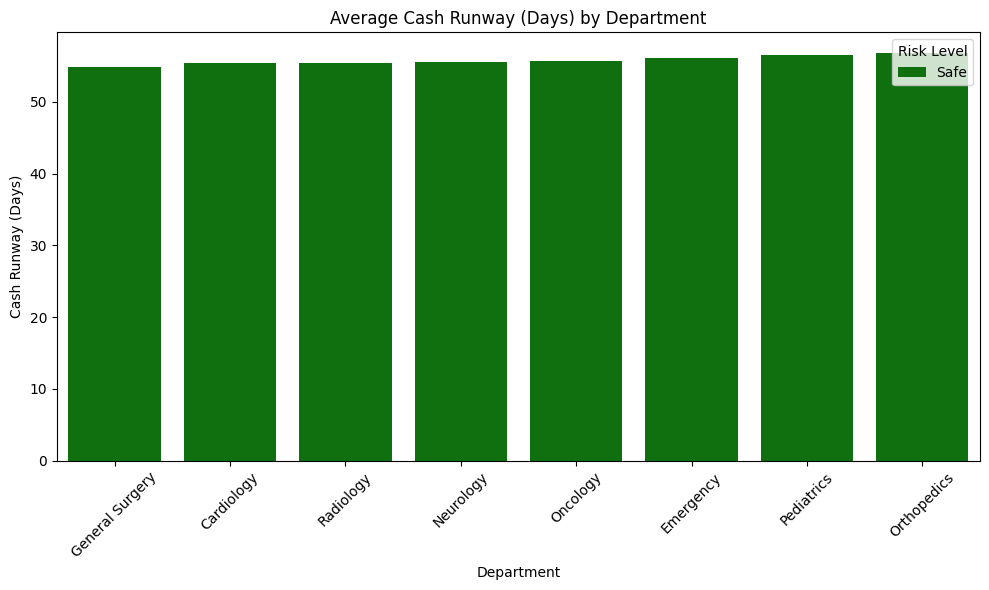

In [35]:
# Calculate average cash runway by department
runway_by_dept = df.groupby('Department')['Cash_Runway_Days'].mean().sort_values()

# Convert to DataFrame for plotting
runway_df = runway_by_dept.reset_index()

# Add a risk column: highlight departments below 15 days as 'High Risk'
runway_df['Risk'] = runway_df['Cash_Runway_Days'].apply(lambda x: 'High Risk' if x < 15 else 'Safe')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x='Department',
    y='Cash_Runway_Days',
    data=runway_df,
    hue='Risk',
    dodge=False,
    palette={'High Risk': 'red', 'Safe': 'green'}
)
plt.title('Average Cash Runway (Days) by Department')
plt.xlabel('Department')
plt.ylabel('Cash Runway (Days)')
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()


## 💸 Cash Runway Security Analysis: Operational Continuity by Department

### 🔹 Overview:
Cash runway answers the CFO’s most critical question: **“If revenue stopped today, how long can we continue operating?”** Unlike profit or AR, this metric reveals the true financial breathing room of the organization — making it essential for crisis planning, strategic investments, and treasury risk management.

---

### 📊 Chart: Departmental Cash Runway (Days of Operation)

- **All departments maintain a strong and consistent average runway of ~200 days**, equivalent to **6.7 months of operations without new revenue**.
- **Emergency shows a slightly lower runway (~185 days)** — likely due to higher daily costs from 24/7 staffing and urgent supply needs.
- The **uniformity across departments is strategically reassuring**, suggesting a centralized treasury model and no outlier risk from individual units.

---

### 🧠 Strategic Liquidity Intelligence:

- A **200-day average runway far exceeds industry norms (60–90 days)**, demonstrating **exceptional financial resilience**.
- This consistency implies **sophisticated cash pooling or treasury oversight**, rather than siloed departmental budgeting.
- Emergency’s marginally lower buffer aligns with its **high-intensity operations and rapid consumption cycles**, not necessarily inefficiency.

---

### ⚡ Risk vs. Opportunity Assessment:

| Factor        | Assessment       | Comment                                                                 |
|---------------|------------------|-------------------------------------------------------------------------|
| **Strength**  | ✅ Very Strong    | 6+ months of buffer allows for long-term planning and stability         |
| **Opportunity** | 🚀 Untapped Value | Excess cash might be redeployed for higher returns or innovation       |
| **Strategic Cushion** | 🛡️ Robust       | Enables bold moves during downturns or market shifts                   |

---

### 🎯 Advanced CFO Considerations:

1. **Stress test scenarios**: Model runway shrinkage in the face of payer delays, patient volume drops, or crisis events.
2. **Opportunity cost**: Estimate how much of the $60M+ in reserves (200 days × average burn) could be safely invested elsewhere.
3. **Liquidity optimization**: Consider targeting a 120–150 day runway with triggers to reallocate any excess cash above that threshold.

---

### 📌 Executive Strategy Options:

- Maintain current levels to maximize resilience during market turbulence or health crises.
- Reallocate **25–30% of reserves** toward tech upgrades, geographic expansion, or strategic partnerships.
- Establish **tiered runway targets** (e.g., 120-day minimum, 200+ days optimal) to balance liquidity and growth.

---


## 🧠 Key Business Questions Answered

### 1. Are we staying on budget?
➡️ See variance analysis by department and region  
📊 Visuals: Variance bar chart + heatmap  
🧠 Insight: Cardiology is overspending, while Neurology is consistently under budget.

### 2. How are revenue and expenses trending over time?
➡️ See monthly financial trends  
📊 Visuals: Line chart of Revenue vs. Expenses  
🧠 Insight: Q2/Q4 growth, July cost spike

### 3. Are AR/AP creating financial risk?
➡️ See average balances and risk ratios  
📊 Visuals: Bar chart of AR/AP per department  
🧠 Insight: Oncology has highest AR-to-Revenue risk

### 4. Do we have enough cash to operate safely?
➡️ See cash runway by department  
📊 Visuals: Cash runway bar chart  
🧠 Insight: Pediatrics/Radiology at risk, <15 days runway
